## CASE STUDY:DATA EXPLORATORY ANALYSIS FOR CREDIT CARD DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [6]:
customer = pd.read_csv("C:\ANALAYTIX LABS\PYTHON\PROJECT3 CREDIT CARD DATA\Customer Acqusition.csv",usecols=["Customer","Age","City","Product","Limit","Company","Segment"])
repayment = pd.read_csv("C:\ANALAYTIX LABS\PYTHON\PROJECT3 CREDIT CARD DATA\Repayment.csv",usecols = ["Customer","Month","Amount"])
spend = pd.read_csv("C:\ANALAYTIX LABS\PYTHON\PROJECT3 CREDIT CARD DATA\spend.csv",usecols=["Customer","Month","Type","Amount"])

In [9]:
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001,C4,Govt
4,A5,56,BANGALORE,Platimum,10002,C5,Normal Salary


In [11]:
repayment.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [12]:
spend.head(2)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13


In [17]:
customer.dtypes

Customer    object
Age          int64
City        object
Product     object
Limit        int64
Company     object
Segment     object
dtype: object

In [18]:
repayment.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

In [24]:
spend.dtypes

Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [25]:
customer.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [26]:
repayment.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [27]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

# 1a. In case age is less than 18, replace it with mean of age values.

In [28]:
mean = customer["Age"].mean()
mean

46.49

In [29]:
customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()

In [31]:
mean_new = customer["Age"].mean()
mean_new 

48.399399999999986

In [32]:
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002,C5,Normal Salary


###  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [34]:
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002,C5,Normal Salary


In [33]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [37]:
merged_c_s = pd.merge(left=customer,right=spend,on="Customer",how="inner")
merged_c_s.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [39]:
merged_c_s [merged_c_s ["Amount"] > merged_c_s ['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000,C2,Salaried_MNC,3-Jan-04,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000,C2,Salaried_MNC,6-Apr-04,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000,C2,Salaried_MNC,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003,C10,Govt,30-Mar-06,RENTAL,483886.62
1496,A97,58.0,TRIVANDRUM,Platimum,10000,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [40]:
merged_c_s.loc[merged_c_s["Amount"] > merged_c_s["Limit"],"Amount"] = (50 *merged_c_s["Limit"]).div(100)

In [44]:
merged_c_s.loc[merged_c_s["Amount"] > merged_c_s["Limit"]]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


###  c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [ ]:
customer.head(1)

In [ ]:
repayment.head(1)

In [47]:
merged_c_s2 = pd.merge(left=repayment,right=customer,on="Customer",how="inner")
merged_c_s2 .head()

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000,C1,Self Employed


In [48]:
merged_c_s2[merged_c_s2["Amount"] > merged_c_s2["Limit"]]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
18,A8,5-Feb-04,156913.59,67.0,PATNA,Silver,100002,C8,Salaried_Pvt
19,A8,12-Jan-04,350999.98,67.0,PATNA,Silver,100002,C8,Salaried_Pvt
20,A8,31-Mar-06,155642.95,67.0,PATNA,Silver,100002,C8,Salaried_Pvt
21,A8,9-May-05,145457.38,67.0,PATNA,Silver,100002,C8,Salaried_Pvt
22,A8,8-May-06,361184.89,67.0,PATNA,Silver,100002,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...
1494,A7,6-May-06,400375.97,26.0,COCHIN,Silver,100001,C7,Salaried_MNC
1496,A7,3-Dec-05,429700.12,26.0,COCHIN,Silver,100001,C7,Salaried_MNC
1497,A7,23-Feb-05,344628.72,26.0,COCHIN,Silver,100001,C7,Salaried_MNC
1498,A7,31-Mar-06,336264.37,26.0,COCHIN,Silver,100001,C7,Salaried_MNC


In [49]:
merged_c_s2.loc[merged_c_s2["Amount"] > merged_c_s2["Limit"],"Amount"] = merged_c_s2["Limit"]

In [50]:
merged_c_s2.loc[merged_c_s2["Amount"] > merged_c_s2["Limit"]]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment


# 2. From the above dataset create the following summaries: 

### a. How many distinct customers exist?

In [53]:
distinct_customer= customer["Customer"].nunique()
distinct_customer

100

###  b. How many distinct categories exist?

In [54]:
customer["Segment"].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


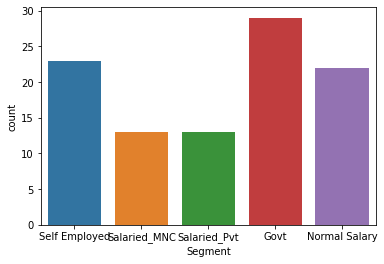

In [55]:
sns.countplot('Segment',data=customer)
plt.show()

### c. What is the average monthly spend by customers 

In [56]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [57]:
spend['Month'] = pd.to_datetime(spend['Month'])

In [58]:
spend.head()

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [59]:
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Yearly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [60]:
spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [63]:
cust_spend_grp= round(spend.groupby(['Yearly','Monthly']).mean(),2)
cust_spend_grp

Amount
Yearly Monthly             
2004   April      235272.04
       February   221215.27
       January    251712.07
       March      232146.12
       May        217539.24
       November   270486.40
       September  310923.38
2005   April      252181.33
       August     233734.63
       December   147503.06
       February   229802.28
       January    292741.37
       July       229116.66
       June       262688.11
       May        245696.52
       November   286143.32
       October    194568.64
       September  188666.20
2006   April      232468.97
       August     240699.72
       December   270470.98
       February   253858.26
       January    282058.01
       July       287505.10
       June       177252.39
       March      247166.08
       May        236162.74
       November   182841.29
       October    236136.34
       September  158520.09

###  d. What is the average monthly repayment by customers?

In [65]:
repayment.head(2)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [66]:
repayment["Month"] = pd.to_datetime(repayment["Month"])

In [67]:
repayment.head(2)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [68]:
repayment['Monthly'] = repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repayment['Yearly'] = repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [69]:
repayment.head(2)

,Customer,Month,Amount,Monthly,Yearly
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004


In [71]:
cust_repayment_grp= round(repayment.groupby(['Yearly','Monthly']).mean(),2)
cust_repayment_grp

Amount
Yearly Monthly             
2004   April      259141.68
       February   256702.63
       January    243489.65
       March      252585.28
       May        226162.72
       November   209592.24
       September  184487.85
2005   April      212688.63
       August     264430.92
       December   320379.34
       February   238829.27
       January    240548.10
       July       239871.48
       June       210199.82
       May        263207.37
       November   256695.12
       October    219849.96
       September  247700.17
2006   April      275472.25
       August     224143.99
       December   252736.57
       February   284489.57
       January    293475.39
       July       257936.38
       June       251990.45
       March      240851.27
       May        256920.88
       November   199399.20
       October    260765.48
       September  262533.88

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [78]:
merge_c_s_r = pd.merge(left=merged_c_s ,right=repayment,on="Customer",how="inner")
merge_c_s_r.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-15,259490.06,January,2004
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-25,437555.12,January,2004
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2005-01-17,165972.88,January,2005


In [80]:
interest= merge_c_s_r .groupby(["Yearly","Monthly"])['Amount_x','Amount_y'].sum()
interest

C:\Users\hp\AppData\Local\Temp/ipykernel_16960/4078671070.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest= merge_c_s_r .groupby(["Yearly","Monthly"])['Amount_x','Amount_y'].sum()


Amount_x      Amount_y
Yearly Monthly                              
2004   April      1.194516e+08  2.285403e+08
       February   7.613922e+07  1.602419e+08
       January    1.088357e+09  1.699210e+09
       March      5.594171e+07  8.974470e+07
       May        8.800456e+07  1.411594e+08
       November   5.504612e+07  7.860290e+07
       September  5.144278e+07  8.016122e+07
2005   April      9.366405e+07  1.747894e+08
       August     1.361400e+08  2.477449e+08
       December   4.348638e+07  9.944533e+07
       February   5.890557e+08  9.416163e+08
       January    1.324129e+08  1.810333e+08
       July       3.995653e+07  7.997268e+07
       June       1.174019e+08  2.213774e+08
       May        7.149030e+08  1.099197e+09
       November   1.532278e+08  2.763119e+08
       October    3.140993e+07  6.027830e+07
       September  3.195551e+07  7.530449e+07
2006   April      3.229722e+08  6.093666e+08
       August     5.849630e+07  7.167032e+07
       December   4.585222e+07  7.087702e+07
       February   1.654843e+08  2.903280e+08
       January    5.127574e+07  8.974491e+07
       July       1.444093e+08  2.245720e+08
       June       5.302118e+07  6.914431e+07
       March      7.393854e+08  1.115725e+09
       May        3.297954e+08  5.434823e+08
       November   1.124836e+08  1.355832e+08
       October    5.285823e+07  7.890924e+07
       September  5.395681e+07  8.083199e+07

In [84]:
interest['Monthly Profit'] = interest['Amount_y'] - interest['Amount_x']
interest

Amount_x      Amount_y  Monthly Profit
Yearly Monthly                                              
2004   April      1.194516e+08  2.285403e+08    1.090887e+08
       February   7.613922e+07  1.602419e+08    8.410268e+07
       January    1.088357e+09  1.699210e+09    6.108525e+08
       March      5.594171e+07  8.974470e+07    3.380298e+07
       May        8.800456e+07  1.411594e+08    5.315485e+07
       November   5.504612e+07  7.860290e+07    2.355678e+07
       September  5.144278e+07  8.016122e+07    2.871844e+07
2005   April      9.366405e+07  1.747894e+08    8.112539e+07
       August     1.361400e+08  2.477449e+08    1.116049e+08
       December   4.348638e+07  9.944533e+07    5.595895e+07
       February   5.890557e+08  9.416163e+08    3.525606e+08
       January    1.324129e+08  1.810333e+08    4.862042e+07
       July       3.995653e+07  7.997268e+07    4.001615e+07
       June       1.174019e+08  2.213774e+08    1.039755e+08
       May        7.149030e+08  1.099197e+09    3.842944e+08
       November   1.532278e+08  2.763119e+08    1.230841e+08
       October    3.140993e+07  6.027830e+07    2.886837e+07
       September  3.195551e+07  7.530449e+07    4.334898e+07
2006   April      3.229722e+08  6.093666e+08    2.863944e+08
       August     5.849630e+07  7.167032e+07    1.317402e+07
       December   4.585222e+07  7.087702e+07    2.502480e+07
       February   1.654843e+08  2.903280e+08    1.248436e+08
       January    5.127574e+07  8.974491e+07    3.846917e+07
       July       1.444093e+08  2.245720e+08    8.016271e+07
       June       5.302118e+07  6.914431e+07    1.612313e+07
       March      7.393854e+08  1.115725e+09    3.763400e+08
       May        3.297954e+08  5.434823e+08    2.136869e+08
       November   1.124836e+08  1.355832e+08    2.309955e+07
       October    5.285823e+07  7.890924e+07    2.605102e+07
       September  5.395681e+07  8.083199e+07    2.687518e+07

In [86]:
interest['Interest Earned'] = (2.9* interest['Monthly Profit'])/100
interest

Amount_x      Amount_y  Monthly Profit  Interest Earned
Yearly Monthly                                                               
2004   April      1.194516e+08  2.285403e+08    1.090887e+08     3.163572e+06
       February   7.613922e+07  1.602419e+08    8.410268e+07     2.438978e+06
       January    1.088357e+09  1.699210e+09    6.108525e+08     1.771472e+07
       March      5.594171e+07  8.974470e+07    3.380298e+07     9.802865e+05
       May        8.800456e+07  1.411594e+08    5.315485e+07     1.541491e+06
       November   5.504612e+07  7.860290e+07    2.355678e+07     6.831466e+05
       September  5.144278e+07  8.016122e+07    2.871844e+07     8.328349e+05
2005   April      9.366405e+07  1.747894e+08    8.112539e+07     2.352636e+06
       August     1.361400e+08  2.477449e+08    1.116049e+08     3.236542e+06
       December   4.348638e+07  9.944533e+07    5.595895e+07     1.622810e+06
       February   5.890557e+08  9.416163e+08    3.525606e+08     1.022426e+07
       January    1.324129e+08  1.810333e+08    4.862042e+07     1.409992e+06
       July       3.995653e+07  7.997268e+07    4.001615e+07     1.160468e+06
       June       1.174019e+08  2.213774e+08    1.039755e+08     3.015290e+06
       May        7.149030e+08  1.099197e+09    3.842944e+08     1.114454e+07
       November   1.532278e+08  2.763119e+08    1.230841e+08     3.569438e+06
       October    3.140993e+07  6.027830e+07    2.886837e+07     8.371827e+05
       September  3.195551e+07  7.530449e+07    4.334898e+07     1.257121e+06
2006   April      3.229722e+08  6.093666e+08    2.863944e+08     8.305437e+06
       August     5.849630e+07  7.167032e+07    1.317402e+07     3.820465e+05
       December   4.585222e+07  7.087702e+07    2.502480e+07     7.257193e+05
       February   1.654843e+08  2.903280e+08    1.248436e+08     3.620465e+06
       January    5.127574e+07  8.974491e+07    3.846917e+07     1.115606e+06
       July       1.444093e+08  2.245720e+08    8.016271e+07     2.324719e+06
       June       5.302118e+07  6.914431e+07    1.612313e+07     4.675707e+05
       March      7.393854e+08  1.115725e+09    3.763400e+08     1.091386e+07
       May        3.297954e+08  5.434823e+08    2.136869e+08     6.196920e+06
       November   1.124836e+08  1.355832e+08    2.309955e+07     6.698869e+05
       October    5.285823e+07  7.890924e+07    2.605102e+07     7.554795e+05
       September  5.395681e+07  8.083199e+07    2.687518e+07     7.793803e+05

### f. What are the top 5 product types?

In [87]:
spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [88]:
spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

### g. Which city is having maximum spend?


In [92]:
merged_c_s.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [94]:
max_spend = merged_c_s.groupby("City")["Amount"].sum().sort_values(ascending=False)
max_spend 

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

### h. Which age group is spending more money?


In [98]:
merged_c_s["Age Group"]=pd.cut(merged_c_s["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"])
merged_c_s.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82


In [100]:
age_spend = merged_c_s.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)
age_spend

Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

### i. Who are the top 10 customers in terms of repayment?

In [103]:
merged_c_s2.head()

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000,C1,Self Employed


In [105]:
merged_c_s2.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

In [106]:
merged_c_s.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82


In [111]:
merged_c_s["Month"] = pd.to_datetime(merged_c_s["Month"])
merged_c_s.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82


In [114]:
merged_c_s['Year'] = merged_c_s['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
merged_c_s.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005


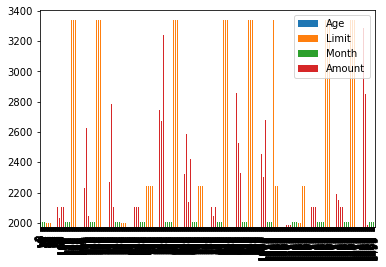

In [121]:
merged_c_s.plot(kind="bar")
plt.show()

In [123]:
#by creating pivot table
merged_c_s_pivot = pd.pivot_table(data = merged_c_s,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")
merged_c_s_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

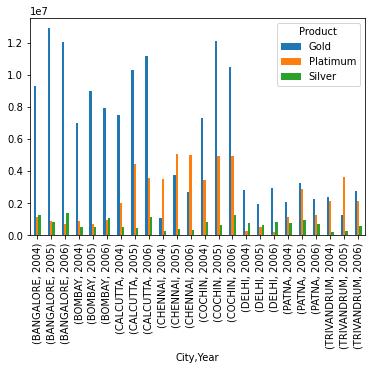

In [124]:
merged_c_s_pivot.plot(kind="bar")
plt.show()

# 4. Create graphs for

### a. Monthly comparison of total spends, city wise

In [127]:
merged_c_s.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005


In [130]:
merged_c_s['Monthly'] = merged_c_s['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
merged_c_s.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004,January
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [147]:
month_city = merged_c_s.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()
month_city.head()

,Monthly,City,Amount
0,April,BANGALORE,4207980.48
1,April,BOMBAY,1873785.01
2,April,CALCUTTA,3457507.95
3,April,CHENNAI,2518656.99
4,April,COCHIN,3882744.94


In [148]:
month_city =pd.pivot_table(data=merged_c_s,values='Amount',index='City',columns='Monthly',aggfunc='sum')
month_city 

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


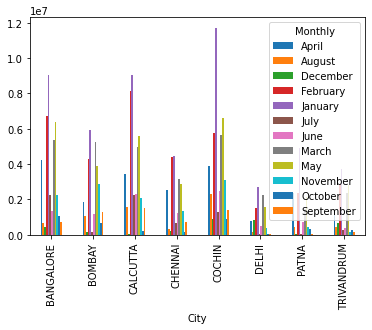

In [149]:
month_city.plot(kind="bar")
plt.show()

### b. Comparison of yearly spend on air tickets

In [150]:
merged_c_s.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004,January
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [151]:
air_tickets = merged_c_s.groupby(["Year","Type"])[["Amount"]].sum().reset_index()
air_tickets 

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72
5,2004,CAR,2326442.62
6,2004,CLOTHES,2685429.91
7,2004,FOOD,7727298.46
8,2004,JEWELLERY,2579785.80
9,2004,MOVIE TICKET,1588392.99


In [152]:
x= air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]
x

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


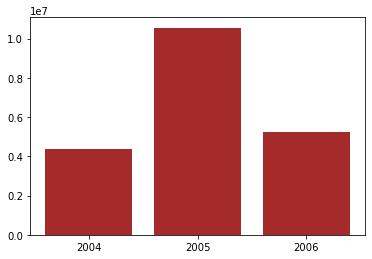

In [156]:
plt.bar(x["Year"],height=x["Amount"],color="brown")
plt.show()

###  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [157]:
merged_c_s.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004,January
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [159]:
products = pd.pivot_table(data=merged_c_s,index='Product',columns='Monthly',values='Amount',aggfunc='sum')
products 

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


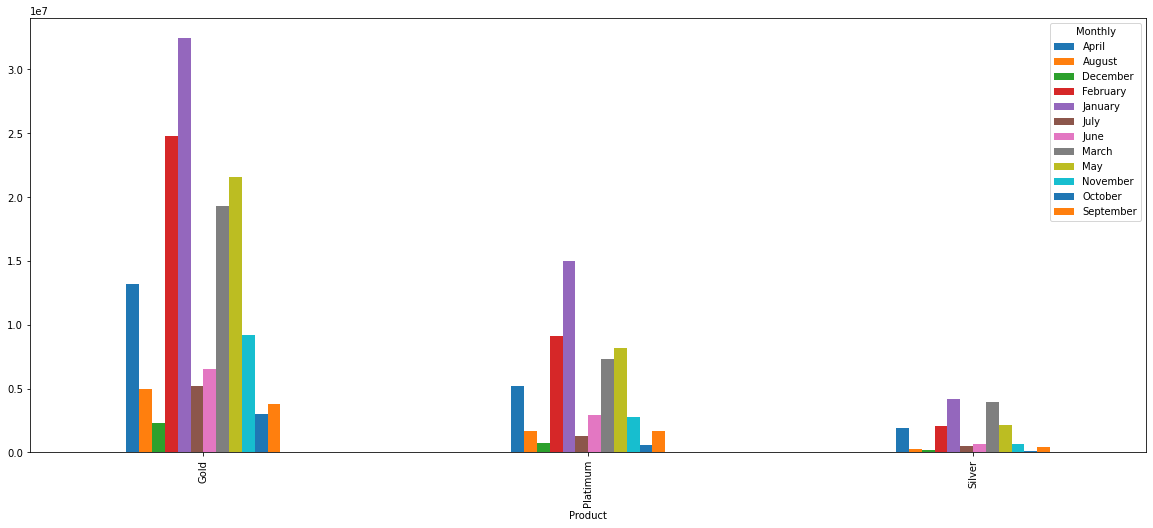

In [163]:
products.plot(kind="bar",figsize=(20,8),width=0.4)
plt.show()

# 5. Write user defined PYTHON function to perform the following analysis:


### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers0

In [165]:
merged_c_s2.head()

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000,C1,Self Employed


In [168]:
merged_c_s2['Month'] = pd.to_datetime(merged_c_s2['Month'])
merged_c_s2.head(2)

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,76.0,BANGALORE,Gold,500000,C1,Self Employed
1,A1,2004-01-03,245899.02,76.0,BANGALORE,Gold,500000,C1,Self Employed


In [169]:
merged_c_s2['Monthly'] = merged_c_s2['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
merged_c_s2['Yearly'] =merged_c_s2['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [172]:
def summary_report(product,timeperiod):
    print('enter product name and timeperiod')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = merged_c_s2.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = merged_c_s2.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = merged_c_s2.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = merged_c_s2.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = merged_c_s2.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = merged_c_s2.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [178]:
summary_report('gold','yearly')

enter product name and timeperiod


Yearly                             2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        2359797.84  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A14       2770261.30  2491981.61  2681025.72
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
                   A63        788855.60         NaN   211117.12
                   A81              NaN         NaN   207780.32
                   A88              NaN         NaN   146821.30
                   A92              NaN         NaN   459105.69
        COCHIN     A11        958556.39  2045470.88  2306906.76
                   A16       1122211.16  1226247.16  1911369.63
                   A32        344312.67   696673.46  1517308.65
                   A45       2557947.39  4042447.57  1847939.91
                   A61       2518154.95  4276860.55  3744127.41
                   A65        468922.60   230667.34         NaN
                   A90              NaN         NaN   109931.32
                   A94        153465.89         NaN         NaN
        CALCUTTA   A10        892190.53  1246843.93  1556613.06
                   A15       1051502.61  1720768.79  2783141.43
                   A29       1376793.94  1706779.22  3434298.00
                   A31        407599.13  1448641.71  1527798.41
                   A60       2890721.81  3742856.10  3242712.83
                   A89              NaN         NaN   497237.97
        BOMBAY     A12       2339080.90  2877588.30  3118090.96
                   A17       1425448.02   731143.83  3127783.14
                   A42       3045914.71  3125758.43  1443787.72
                   A62       1744114.25  1541617.21  1684085.69
                   A91              NaN         NaN   247781.00
        CHENNAI    A27       1842823.04  2782591.71  2387485.81
                   A67         67845.60    55638.77         NaN
        TRIVANDRUM A28        965108.49  2827009.82  3376614.65
        PATNA      A26       1490427.84  2433837.95  3330421.30
                   A66        477039.78         NaN   113094.58
                   A95        369405.96         NaN         NaN
        DELHI      A44       2149383.50  4165317.77  1430028.85
                   A64              NaN         NaN   323229.09
                   A82              NaN         NaN   342200.74
                   A93        342326.14         NaN         NaN